# 클러스터링 결과 시각화하기

### 3229개 데이터의 장르를 3개의 군집으로 

In [1]:
import pandas as pd

In [2]:
data_3229 = pd.read_csv("/opt/ml/.jupyter/lab/workspaces/data/3229_plus_side_info_plus_korean_genre_and_plot.csv")
data = data_3229[['Contents', 'movieId', 'genres']]
data = data.drop_duplicates(subset=['movieId'])
data['movieId'] = data['movieId'].apply(lambda x : int(x))

In [3]:
def delete_s(sen):
    sen = sen.replace(" ","")
    return sen

In [4]:
def delete(genre_sentence):
    try:
        genre_sentence = genre_sentence.replace("'","")
        genre_sentence = genre_sentence[genre_sentence.index("[")+1:genre_sentence.index("]")]
        genre_sentence = list(map(delete_s, genre_sentence.split(",")))
        return genre_sentence
    except:
        return None

In [5]:
data['genres_list'] = data['genres'].apply(lambda x:delete(x))

In [6]:
data.dropna(axis=0, inplace=True)

In [7]:
genre = []
for genres in list(data['genres_list']):
    genre.extend(genres)
genre = list(set(genre))
genre

['Talk-Show',
 'Drama',
 'Romance',
 'Comedy',
 'Adventure',
 'Biography',
 'History',
 'News',
 'Sci-Fi',
 'Music',
 'Reality-TV',
 'War',
 'Film-Noir',
 'Thriller',
 'Action',
 'Game-Show',
 'Musical',
 'Animation',
 'Documentary',
 'Horror',
 'Western',
 'Crime',
 'Fantasy',
 'Short',
 'Mystery',
 'Sport',
 'Family']

In [8]:
values = []
for x in range(len(genre)):
    values.append(x)
print(values)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26]


In [9]:
import numpy as np
encoding = np.eye(len(values))[values]
encoding

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [10]:
genre_dic = dict()
for idx, g in enumerate(genre):
    genre_dic[g] = idx
genre_dic

{'Talk-Show': 0,
 'Drama': 1,
 'Romance': 2,
 'Comedy': 3,
 'Adventure': 4,
 'Biography': 5,
 'History': 6,
 'News': 7,
 'Sci-Fi': 8,
 'Music': 9,
 'Reality-TV': 10,
 'War': 11,
 'Film-Noir': 12,
 'Thriller': 13,
 'Action': 14,
 'Game-Show': 15,
 'Musical': 16,
 'Animation': 17,
 'Documentary': 18,
 'Horror': 19,
 'Western': 20,
 'Crime': 21,
 'Fantasy': 22,
 'Short': 23,
 'Mystery': 24,
 'Sport': 25,
 'Family': 26}

In [11]:
def get_encoding(genre):
    g_encoding = np.zeros(27)
    for g in genre:
        g_encoding += encoding[genre_dic[g]]
    return g_encoding

In [12]:
data['genre_encode'] = data['genres_list'].apply(lambda x: get_encoding(x))

In [13]:
encode_df = pd.merge(data['movieId'], pd.DataFrame(list(data['genre_encode']), index=data['movieId']), on='movieId',how='inner')

In [28]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,17,18,19,20,21,22,23,24,25,26
0,73141,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,122470,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,152081,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4447,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1246,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,31427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2985,150254,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2986,122916,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2987,177115,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
X = encode_df.iloc[:,1:]

In [35]:
# kmeans
from sklearn import cluster 
from sklearn import preprocessing
kmeans = cluster.KMeans(n_clusters=3, random_state=2023)

In [36]:
X = preprocessing.StandardScaler().fit_transform(X)
kmeans.fit(X)
cluster_label = kmeans.labels_ 

/opt/conda/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [37]:
encode_df['cluster'] = cluster_label

In [44]:
encode_df

,movieId,0,1,2,3,4,5,6,7,8,...,18,19,20,21,22,23,24,25,26,cluster
0,73141,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
1,122470,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2
2,152081,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2
3,4447,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1246,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2984,31427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2985,150254,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2986,122916,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2
2987,177115,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [39]:
x = encode_df.iloc[:,1:-1].values
x

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Z = StandardScaler().fit_transform(x)

In [41]:
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [42]:
principalDf.head()

,principal component1,principal component2
0,5.973318,-0.116416
1,4.285368,-0.257799
2,3.024549,1.495938
3,0.257580,-1.212986
4,-0.306105,-0.971524


In [48]:
principalDf.shape

(2989, 2)

In [49]:
final_df = pd.concat([encode_df, principalDf], axis=1)

In [43]:
sum(pca.explained_variance_ratio_)

0.19367282679573242

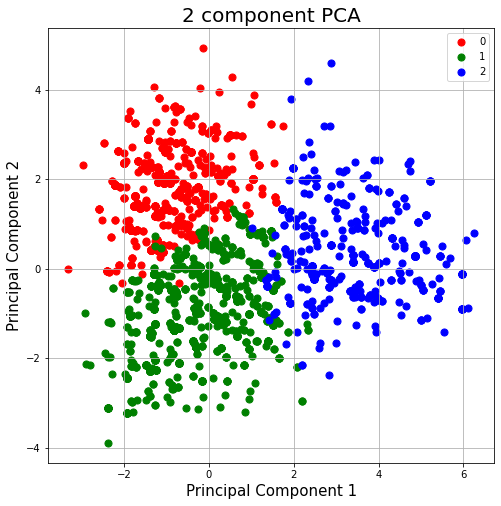

In [52]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final_df['cluster'] == target
    ax.scatter(final_df.loc[indicesToKeep, 'principal component1']
               , final_df.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()